In [58]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
from time import time

train = pd.read_csv('data/train.csv', index_col=None)

# stats_fp = [np.mean, np.std]
stats_fp = [np.mean]

T1_V10, T2_V7
T1_V13, T2_V7
T2_V10, T2_V7
Time 1.26381 sec


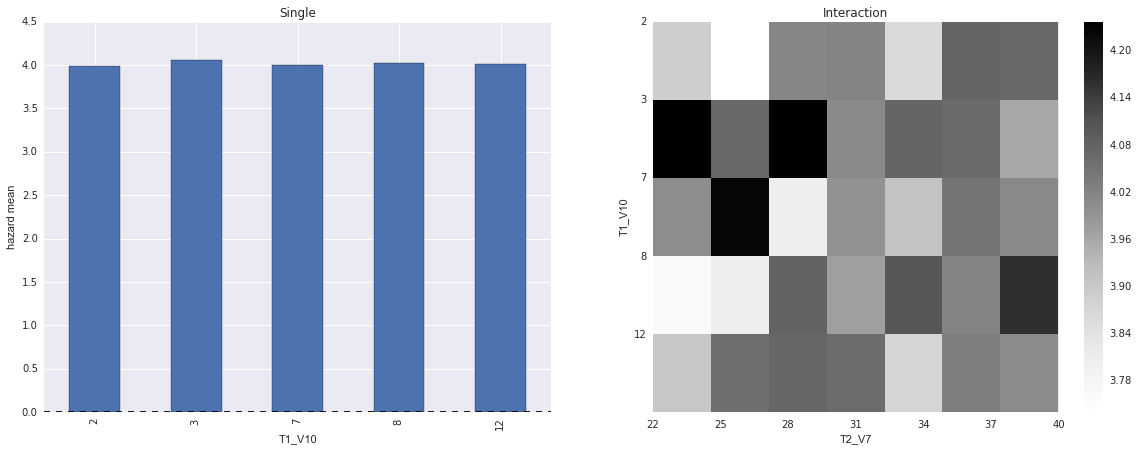

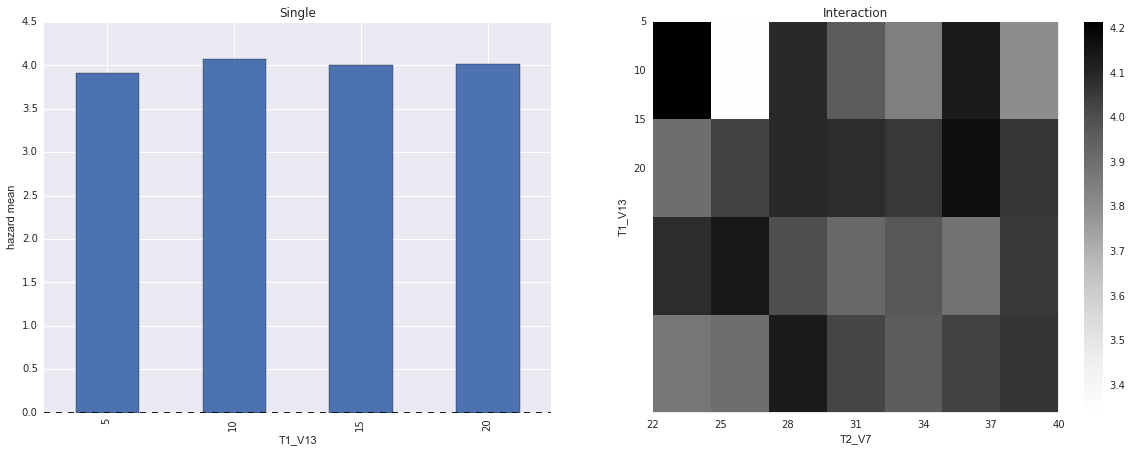

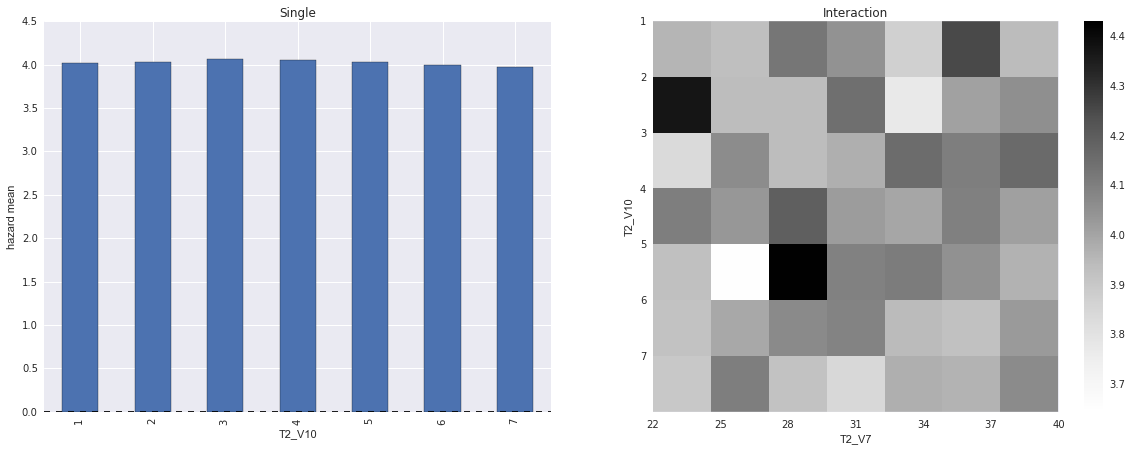

In [65]:
# feats1 = ['T2_V3']
# feats2 = ['T1_V7']

feats1 = ['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']
feats2 = ['T2_V7']

drop_cols = ['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']

tic = time()
# for feat1 in train.select_dtypes(include=['object']).columns:
#     for feat2 in train.select_dtypes(include=['object']).columns:

for feat1 in feats1:
    for feat2 in feats2:
        
        if feat2 == feat1:
            continue
        print('{0}, {1}'.format(feat1,feat2))
        for i, fp in enumerate(stats_fp):

            stats_df1 = train.groupby([feat1])['Hazard'].apply(lambda x: fp(x)).\
                reset_index().rename(columns={'Hazard': feat1 + '_' + stats_fp[0].__name__})
            stats_df2 = train.groupby([feat1, feat2])['Hazard'].apply(lambda x: fp(x)).\
                reset_index().rename(columns={'Hazard': feat1 + '_x_' + feat2 + '_' + stats_fp[0].__name__})

            train = train.reset_index().merge(stats_df2, how='left').set_index('index')
            train = train.reset_index().merge(stats_df1, how='left').set_index('index')

            m = train.groupby([feat1])['Hazard'].mean()
            m2 = train.groupby([feat1, feat2])['Hazard'].mean()

            f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(20, 7))

            m.plot(kind='bar', subplots=True, ax=ax1)
            ax1.set_title('Single')
            ax1.set_ylabel('hazard mean')
            
            im2_data = np.array(m2).reshape([len(ii) for ii in m2.index.levels])
            im2 = ax2.imshow(im2_data, interpolation='None', aspect='auto',
                       extent=[0,len(m2.index.levels[1])/2,len(m2.index.levels[0]),0],
#                             cmap='cubehelix_r'
                            )
            ax2.set_yticklabels(list(m2.index.levels[0]))
            ax2.set_xticklabels(list(m2.index.levels[1]))
            ax2.set_ylabel(m2.index.names[0])
            ax2.set_xlabel(m2.index.names[1])
#             m2.plot(kind='bar',subplots=True, ax=ax2)
            ax2.set_title('Interaction')
            plt.colorbar(im2, ax=ax2)
#             plt.xticks(rotation=0)
#             plt.gcf().savefig('feat_interaction.png')

toc= time() - tic
print 'Time %g sec' % toc

# print(train.head())